# Questions
---

1. What is the difference between artificial intelligence, machine learning and deep learning? (6 points)

AI is an area of computer science that searches that a computer could replicate human inteligence. ML is a subset  of AI, where the goal is to teach a machine to do something using trainig, data with answers, the prediction, and the clasification. 

Deep learning is a subset of machine learning that uses neural networks to teach the machine how to think. 

2. What is supervised learning? (6 points)

Supervised learning is a subset of neural networks, where you use a function that maps an input to an output based on examples. In supervised learning we use weights, inputs , bias and labels  to determine the prediction, and we use that prediction to determine the loss.  We generaly use y = mx + b 

3. What does the loss function represent? (6 points)

The margin of error between the prediction and  the labels, that are the correct answer

4. Describe, in your own words, what are the weights of a neural network, and what kind of data do they store. (6 points)

the weights aare randomized floats that connect the input to the sigma function,  and are momdified in each iteration of the trainig. Is the parameter that learns , that changes in the training. The weight is the general conection between the neural network. It is how much infuelnce the input has on the output

5. What does the 'deep' in deep learning mean? (6 points)

the deep in deep learning usualy means how many hidden layers are between the input and the prediction, the output. 

# Simple Neural Network

Complete the notebook so that you can run the following model on the XOR data set.

![Neural network](https://drive.google.com/uc?id=1jXT22Gd4hMQDJTrNLDRYSMCdCxH1dQ2t)

## Import the necessary packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Define auxiliary functions

### Define the sigmoid and sigmoid derivative functions (10 points)

In [ ]:
# TODO: Define the sigmoid function, as well as the derivative of the function

def sigmoid(x):
  ''' Calculates the sigmoid function on a set of data

    Args:
      x (np array): the array on which you apply the sigmoid function
    
    Returns:
      np array: an array with the result of the function on the input
    
  '''
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  ''' Calculates the derivative of the sigmoid function

    Args:
      x (np array): the array on which you apply the derivative sigmoid function
    
    Returns:
      np array: an array with the result of the function on the input
  '''
  return sigmoid(x) * (1 - sigmoid(x))

In [ ]:
# probar que las funciones de sigmoid y sigmoid_derivative funcionen 
print(sigmoid(np.array([[0,0], [0,1], [1,0], [1,1]]).T))

print(sigmoid_derivative(np.array([[0,0], [0,1], [1,0], [1,1]]).T))


[[0.5        0.5        0.73105858 0.73105858]
 [0.5        0.73105858 0.5        0.73105858]]
[[0.25       0.25       0.19661193 0.19661193]
 [0.25       0.19661193 0.25       0.19661193]]


### Define the loss function (5 points)

In [ ]:
# TODO: Define the loss function

def loss(y_hat, y):
  ''' Calculates the error of a prediction based on an input

  Args:
    y_hat (np array): the predictions of the model
    y (np array): the labels of the data inputs

  Returns:
    np array: an array with the errors for each prediction
  '''
  return -( (y * np.log(y_hat)) + ((1 - y)  * np.log(1 - y_hat)) )

### Define the predict function (15 points)

In [ ]:
# TODO: Define the predict function

def predict(weights, b, input):
  ''' Makes a prediction on an input

  Args:
    weights (np array): The array of weights of a given layer of the model
    b (np array):  The array of biases for a given layer of the model
    input (np array): The input on which to predict

  Returns:
    tuple of np arrays: Tuple containing the value of z = W Input + b, and a = sigmoid(z)
  '''

  z = np.dot(weights, input) + b
  a = sigmoid(z)
  return z,a

## Training with the XOR dataset

### Input data set

In [ ]:
XOR = np.array([[0,0], [0,1], [1,0], [1,1]]).T
print(f"XOR data: \n{XOR}\nShape: {XOR.shape}")

XOR_labels = np.array([[0, 1, 1, 0]])
print(f"XOR labels: \n{XOR_labels}\nShape: {XOR_labels.shape})")

number_inputs = 4

XOR data: 
[[0 0 1 1]
 [0 1 0 1]]
Shape: (2, 4)
XOR labels: 
[[0 1 1 0]]
Shape: (1, 4))


### Run the training step (30 points)

In [ ]:
np.random.seed(42)

# TODO: initialize the needed matrices of weights with random values. Check np.random.randn
weights_1 = np.random.randn(2,3)
weights_2 = np.random.randn(3,1)

print("Weights 1: ", weights_1, weights_1.shape)
print("Weights 2 : ", weights_2, weights_2.shape)

# TODO: initialize the needed biases with random values. Check np.random.randn
b_1 = np.random.randn(3,1)
b_2 = np.random.randn(1, )

print("Bias 1: ", b_1, b_1.shape)
print("Bias 2: ", b_2, b_2.shape)
# TODO: initialize the learning rate
alpha = 0.1

errors = []

for epoch in range(10000):

  # TODO: Make a prediction using the previous method
  input = XOR

  # Forward propagation - prediction
  y_h , y_h_hat = predict(weights_1.T, b_1, input)
  y_o ,  y_o_hat= predict(weights_2.T, b_2, y_h_hat)


  
  # TODO: Calculate the error at the output layer
  J = (1/number_inputs) * np.sum(loss(y_o_hat, XOR_labels))
  errors.append(J)

  # TODO: Calculate the derivatives for the output layer
  dyo = y_o_hat - XOR_labels
  #print("dyo: ", dyo , dyo.shape)

  dw2 = (1/number_inputs) * np.dot(dyo, y_h_hat.T)
  #print("dw2" ,dw2, dw2.shape)

  db2 = (1/number_inputs) * np.sum(dyo)
  #print("db2" ,db2, db2.shape)

  # TODO: Calculate the derivative at the hidden layer
  
  dyh = np.dot(weights_2, dyo) * sigmoid_derivative(y_h)
  #print("dyh", dyn, dyn.shape)

  dw1 = (1/number_inputs) * np.dot(dyh, input.T)
  #print("dw1", dw1, dw1.shape)

  db1 = (1/number_inputs) * np.sum(dyh)
  #print("db1", db1, db1.shape)

  # TODO: Update the weights
  weights_2 -= dw2.T * alpha
  weights_1 -= dw1.T * alpha

  # TODO: Update the biases
  b_2 -= db2 * alpha
  b_1 -= db2 * alpha

  # Print the error after a number of epochs
  if epoch % 100 == 0:
    print(f"Error at epoch {epoch}: {J}")
  

print(f"Weights 1  after training {weights_1}")
print(f"Weights 2  after training {weights_2}")
print(f"Bias 1 after training {b_1}")
print(f"Bias 2 after training {b_2}")

Weights 1:  [[ 0.49671415 -0.1382643   0.64768854]
 [ 1.52302986 -0.23415337 -0.23413696]] (2, 3)
Weights 2 :  [[ 1.57921282]
 [ 0.76743473]
 [-0.46947439]] (3, 1)
Bias 1:  [[ 0.54256004]
 [-0.46341769]
 [-0.46572975]] (3, 1)
Bias 2:  [0.24196227] (1,)
Error at epoch 0: 0.9599553614571963
Error at epoch 100: 0.6890174203898429
Error at epoch 200: 0.6851710272410989
Error at epoch 300: 0.6804985505535388
Error at epoch 400: 0.6746187657550937
Error at epoch 500: 0.6670395093775299
Error at epoch 600: 0.6571975322696113
Error at epoch 700: 0.6444736371288393
Error at epoch 800: 0.6282449160250048
Error at epoch 900: 0.6080351114979203
Error at epoch 1000: 0.5838050283865401
Error at epoch 1100: 0.5561802000196807
Error at epoch 1200: 0.5262461977482495
Error at epoch 1300: 0.49507697026244335
Error at epoch 1400: 0.4635216597763424
Error at epoch 1500: 0.4322539548646039
Error at epoch 1600: 0.40182770371888843
Error at epoch 1700: 0.3726787499314418
Error at epoch 1800: 0.34511707210375

In [ ]:
# tests Prediction algorithm 
z1 , a1 = predict(weights_1.T, b_1, XOR)
print(z1, z1.shape)
print(a1, a1.shape)

z2, a2 = predict(weights_2.T, b_2, a1)
print(z2, z2.shape)
print(a2, a2.shape)

[[ 0.54256004  2.0655899   1.0392742   2.56230405]
 [-0.46341769 -0.69757107 -0.60168199 -0.83583537]
 [-0.46572975 -0.69986671  0.18195878 -0.05217817]] (3, 4)
[[0.63240775 0.88751344 0.73870994 0.92839578]
 [0.38617537 0.33235097 0.35395897 0.30241263]
 [0.38562745 0.33184178 0.5453646  0.48695842]] (3, 4)
[[1.35599087 1.74280133 1.42414817 1.71156423]] (1, 4)
[[0.79510734 0.85104254 0.8059879  0.84703906]] (1, 4)


## Plotting the errors you stored

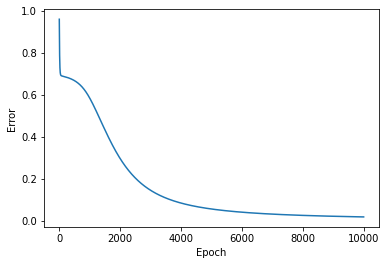

In [ ]:
fig, ax = plt.subplots(1,1)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

ax.plot(errors)

## Make a prediction on the data points to test the model (15 points)

In [ ]:
# TODO: Predict on the sample input
print("\nOutput of the input After Training:\n")
np.set_printoptions(suppress=True)

input = XOR
y_h , y_h_hat = predict(weights_1.T, b_1, input)
y_o ,  y_o_hat= predict(weights_2.T, b_2, y_h_hat)


print(input)

print(y_o_hat)


Output of the input After Training:

[[0 0 1 1]
 [0 1 0 1]]
[[0.01625796 0.98394285 0.9839466  0.02067154]]
